In [1]:
import tensorflow as tf

import json
import os
tf_config = {
                "cluster": 
                    {"chief": ["tripleyoung.synology.me:12346"],
                        "worker": [ "tripleyoung.synology.me:23456"]
                }, 
                "task": {"type": "chief", "index": 0}
            }
os.environ.pop('TF_CONPIG',None) 
os.environ['TF_CONFIG'] = json.dumps(tf_config)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

2023-12-01 18:57:10.944911: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 18:57:10.992169: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 18:57:10.992203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 18:57:10.998111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 18:57:11.016565: I tensorflow/core/platform/cpu_feature_guar

Num GPUs Available:  1


In [2]:
# 모든 환경 변수를 나열합니다.
print(os.environ)

# 특정 환경 변수를 조회합니다.
# 예: 'TF_CONFIG' 환경 변수를 확인합니다.
tf_config = os.environ.get('TF_CONFIG')
print('TF_CONFIG:', tf_config)

environ({'NVIDIA_VISIBLE_DEVICES': 'all', 'HOSTNAME': '537af09353b5', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.3 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=525,driver<526 brand=unknown,driver>=525,driver<526 brand=nvidia,driver>=525,driver<526 brand=nvidiartx,driver>=525,driver<526 brand=geforce,driver>=525,driver<526 brand=geforcertx,driver>=525,driver<526 brand=quadro,driver>=525,driver<526 brand=quadrortx,driver>=525,driver<526 brand=titan,driver>=525,driver<526 brand=titanrtx,driver>=525,driver<526 brand=tesla,driver>=535,driver<536 brand=unknown,driver>=535,driver<536 brand=nvidia,driver>=535,driver<536 brand=nvidiartx,driver>=535,driver<536 bran

In [3]:
strategy = tf.distribute.MultiWorkerMirroredStrategy()


INFO:tensorflow:Enabled multi-worker collective ops with available devices: ['/job:chief/replica:0/task:0/device:CPU:0', '/job:chief/replica:0/task:0/device:GPU:0', '/job:worker/replica:0/task:0/device:CPU:0', '/job:worker/replica:0/task:0/device:GPU:0']


2023-12-01 18:57:33.989264: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 18:57:33.989308: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 18:57:33.989318: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 18:57:34.172403: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 18:57:34.172451: I external/local_xla/xla/stream_executor

INFO:tensorflow:Using MirroredStrategy with devices ('/job:chief/task:0/device:GPU:0',)
INFO:tensorflow:Check health not enabled.
INFO:tensorflow:MultiWorkerMirroredStrategy with cluster_spec = {'chief': ['tripleyoung.synology.me:12346'], 'worker': ['tripleyoung.synology.me:23456']}, task_type = 'chief', task_id = 0, num_workers = 2, local_devices = ('/job:chief/task:0/device:GPU:0',), communication = CommunicationImplementation.AUTO


UMA support.
2023-12-01 18:57:34.176412: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:chief/replica:0/task:0/device:GPU:0 with 5606 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-12-01 18:57:34.186764: I tensorflow/core/distributed_runtime/rpc/grpc_server_lib.cc:457] Started server with target: grpc://tripleyoung.synology.me:12346
2023-12-01 18:57:34.797904: I external/local_tsl/tsl/distributed_runtime/coordination/coordination_service.cc:553] /job:chief/replica:0/task:0 has connected to coordination service. Incarnation: 2400261057969623930
2023-12-01 18:57:34.798492: I external/local_tsl/tsl/distributed_runtime/coordination/coordination_service_agent.cc:304] Coordination agent has successfully connected.
2023-12-01 18:58:13.315371: I external/local_tsl/tsl/distributed_runtime/coordination/coordination_service.cc:553] /job:worker/replica:0/task:0 has connected to coordination service. I

In [4]:
print("Totall GPUs:", strategy.num_replicas_in_sync)


Totall GPUs: 2


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # 메모리 사용 제한을 위한 설정
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    # 특정 GPU만 사용하도록 설정
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작 후에는 GPU 설정을 변경할 수 없으므로
    # 런타임 오류 발생 시 예외 처리가 필요함
    print(e)


Physical devices cannot be modified after being initialized


In [6]:
# 모든 환경 변수를 나열합니다.
print(os.environ)

# 특정 환경 변수를 조회합니다.
# 예: 'TF_CONFIG' 환경 변수를 확인합니다.
tf_config = os.environ.get('TF_CONFIG')
print('TF_CONFIG:', tf_config)

environ({'NVIDIA_VISIBLE_DEVICES': 'all', 'HOSTNAME': '537af09353b5', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.3 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=525,driver<526 brand=unknown,driver>=525,driver<526 brand=nvidia,driver>=525,driver<526 brand=nvidiartx,driver>=525,driver<526 brand=geforce,driver>=525,driver<526 brand=geforcertx,driver>=525,driver<526 brand=quadro,driver>=525,driver<526 brand=quadrortx,driver>=525,driver<526 brand=titan,driver>=525,driver<526 brand=titanrtx,driver>=525,driver<526 brand=tesla,driver>=535,driver<536 brand=unknown,driver>=535,driver<536 brand=nvidia,driver>=535,driver<536 brand=nvidiartx,driver>=535,driver<536 bran

### 프로젝트 수행 요건

프로젝트를 진행하면서 다음 사항들을 필수로 수행해야 합니다:

1. **데이터 증강 (Augmentation) 적용**: 데이터에 한 가지 이상의 augmentation 방법을 적용하여 학습합니다. 사용한 augmentation 방법을 명시해주세요.

2. **U-Net Generator 사용**: 이전에 구현했던 두 개의 Generator 중, Encoder와 Decoder 간에 skip connection이 있는 U-Net Generator를 사용해 주세요.

3. **모델 학습 및 테스트**: 모델을 학습한 후, 학습된 Generator를 이용하여 테스트를 수행합니다. 테스트 데이터로는 다운로드한 "val" 폴더 내의 이미지를 사용합니다.

4. **시각화**: 테스트 과정을 거친 1개 이상의 이미지에 대해, 스케치, 생성된 사진, 실제 사진을 순서대로 나란히 시각화해 주세요.

5. **학습 로그**: 모델을 충분히 학습하기 위한 시간이 부족할 수 있습니다. 최소 10 epoch 이상 학습하며, 중간에 발생하는 손실 값에 대한 로그를 남겨주세요. 테스트 결과가 완벽하지 않아도 괜찮으며, 좋은 결과를 얻기 위해서는 긴 학습 시간이 필요합니다.도 괜찮습니다.

| 항목명명 | 상세기술 |
|---|---|
| pix2pix 모델 학습을 위해 필요한 데이터셋의 증강 | 데이터셋 품질 및 학습 가능 데이터의 augmentation을 통한 데이터셋 구축 과정이 제시되어야 합니다. |
| pix2pix 모델을 구현하여 성능을 높이는 방안 구축 | U-Net generator, discriminator 모델 구축에 있어서의 [train_step()] output을 확인하고 개선하였습니다. |
| 학습 결과 및 테스트에 대한 시각적 결과물 제출 | 10 epoch 이상의 학습을 진행한 결과물 리스트 결과에서 전반적인 epoch 수에 걸친 중간 결과물을 확인하였습니다. |


In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## 데이터 로드

In [8]:
data_path ='cityscapes/train/'
print("number of train examples :", len(os.listdir(data_path)))

number of train examples : 1000


In [9]:
%pip install pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os

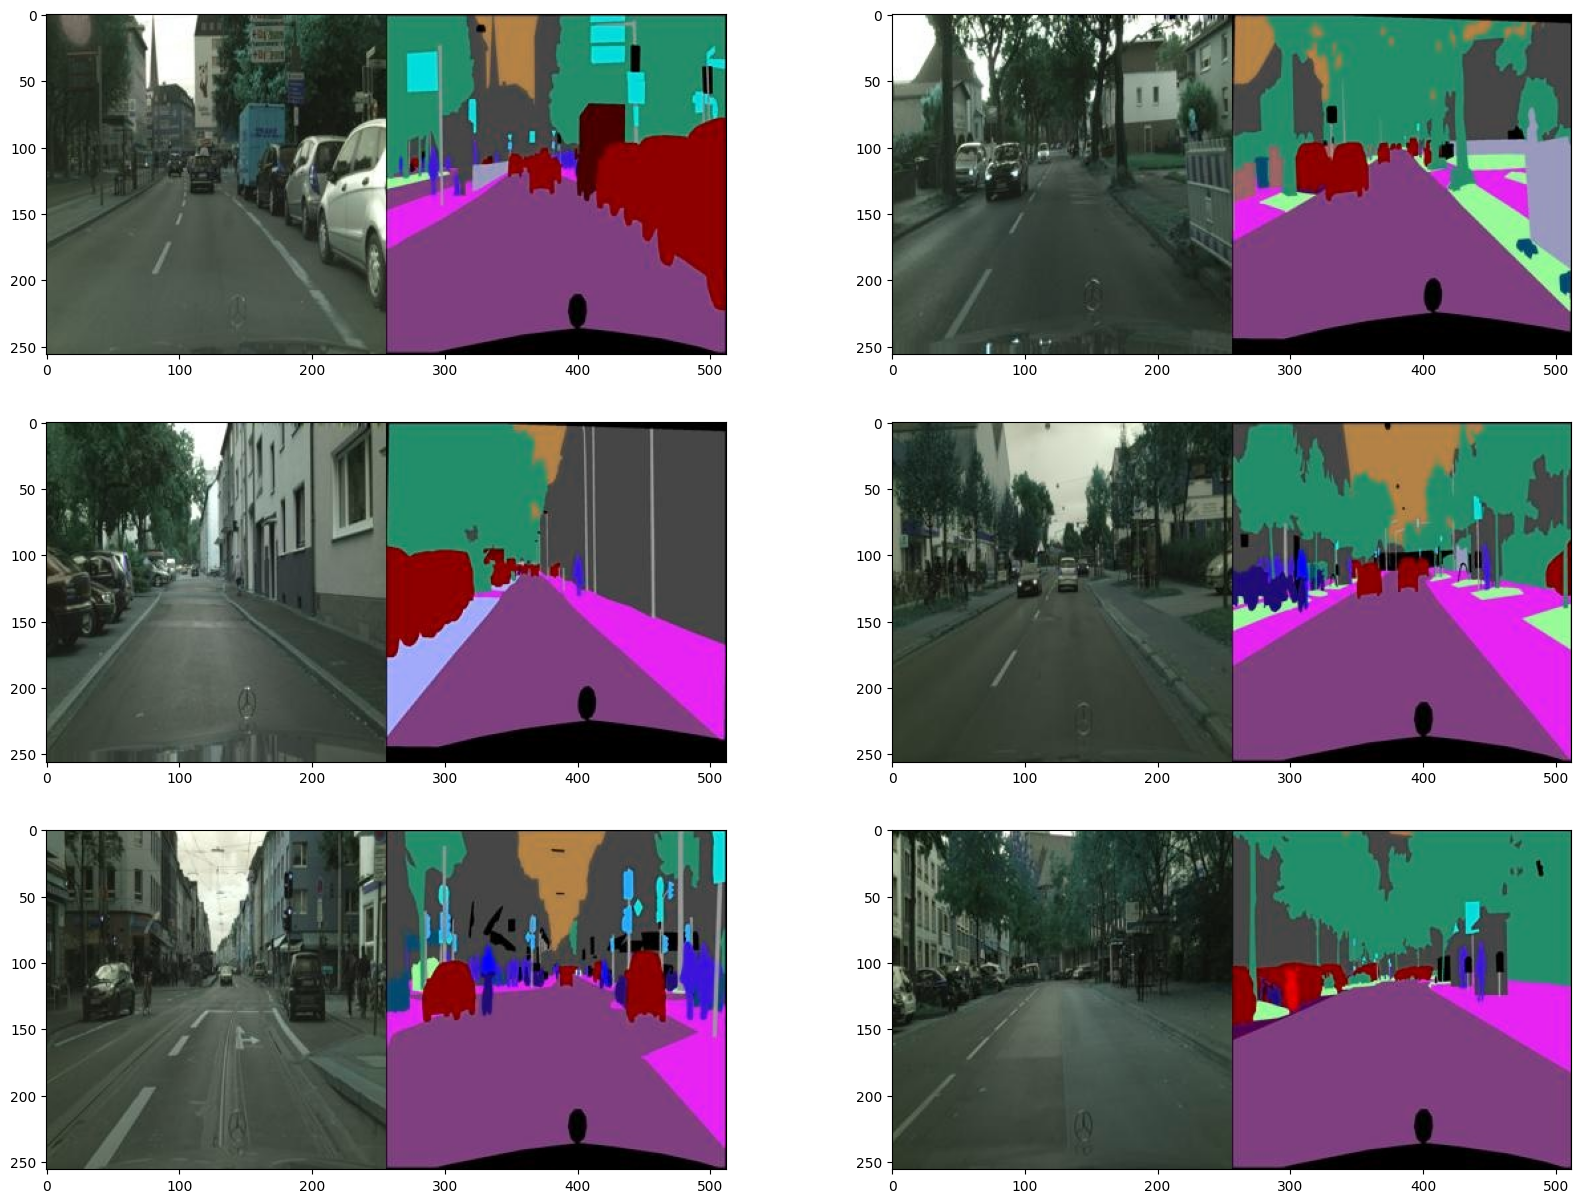

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = data_path + os.listdir(data_path)[np.random.randint(800)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

In [12]:
f = data_path + os.listdir(data_path)[0]
img = cv2.imread(f, cv2.IMREAD_COLOR)
print(img.shape)

(256, 512, 3)


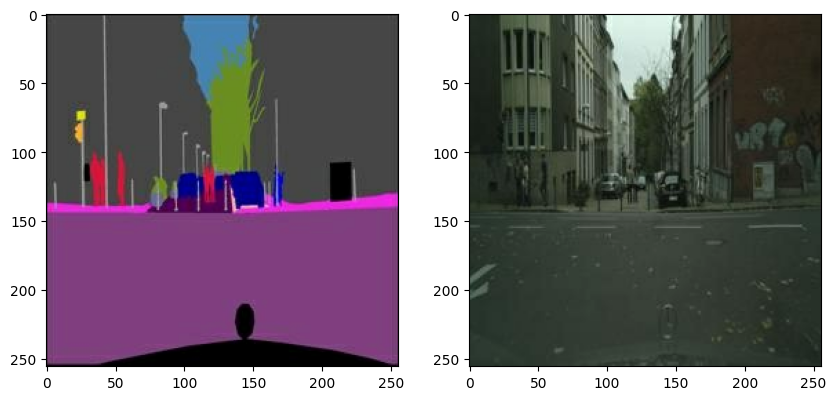

In [13]:
import tensorflow as tf

def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
    sketch = img[:, :w, :] 
    sketch = tf.cast(sketch, tf.float32)
    colored = img[:, w:, :] 
    colored = tf.cast(colored, tf.float32)
    return normalize(sketch), normalize(colored)

f = data_path + os.listdir(data_path)[1]
colored,sketch = load_img(f)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

In [14]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

@tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
def apply_augmentation(colored, sketch):
    stacked = tf.concat([sketch, colored], axis=-1)
    
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    out = image.random_crop(padded, size=[256, 256, 6])
    
    out = image.random_flip_left_right(out)
    out = image.random_flip_up_down(out)
    
    if tf.random.uniform(()) < .5:
        degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
        out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]   

print("✅")

✅


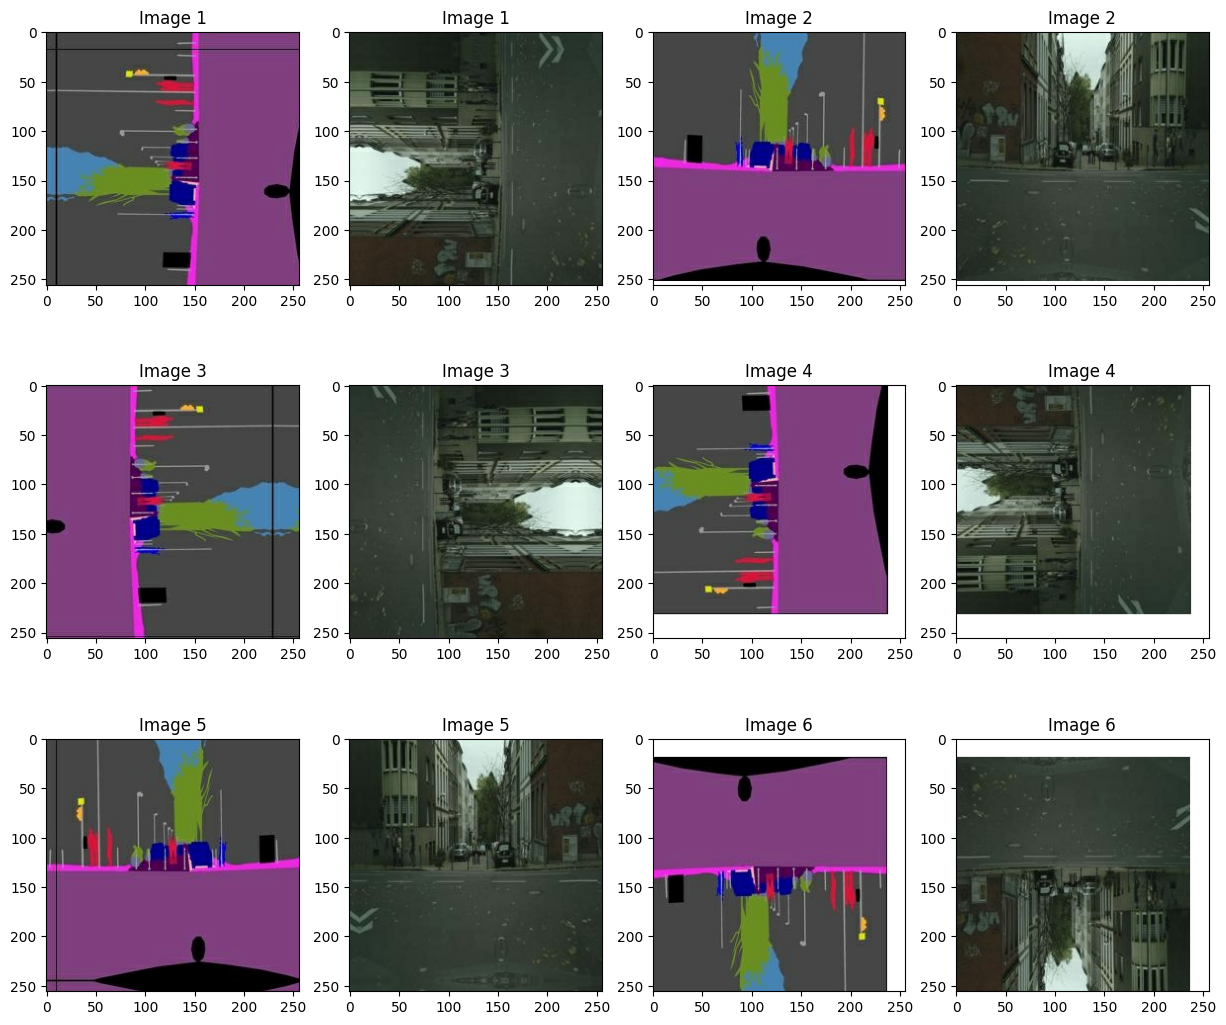

In [15]:
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_colored, augmented_sketch = apply_augmentation(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

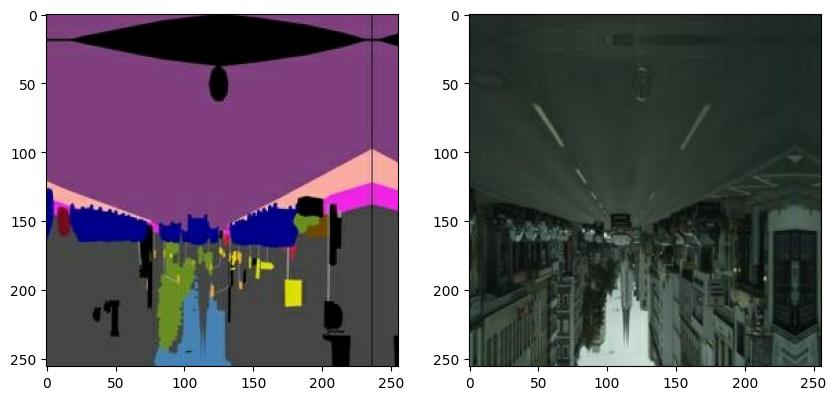

In [16]:
from tensorflow import data
    
def get_train(img_path):
    sketch, colored = load_img(img_path)
    sketch, colored = apply_augmentation(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(data_path + "*.jpg")
train_images = train_images.map(get_train).shuffle(100).batch(4)

sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
colored, sketch = (sample[0][1]+1)*127.5, (sample[0][0]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

In [17]:
from tensorflow.keras import layers, Input, Model

class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu= layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)

print("✅")

✅


In [18]:
class Encoder(layers.Layer):
    def __init__(self):
        super(Encoder, self).__init__()
        filters = [64, 128, 256, 512, 512, 512, 512, 512]

        # EncoderBlock을 쌓습니다.
        self.blocks = [] 
        for i, f in enumerate(filters):
            # 첫 번째 블록에서는 Batch Normalization을 생략합니다.
            self.blocks.append(EncodeBlock(f, use_bn=(i != 0)))

    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
    
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        model = Model(inputs, self.call(inputs))
        return model.summary()

print("✅")


✅


In [19]:
Encoder().get_summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encode_block (EncodeBlock)  (None, 128, 128, 64)      3072      
                                                                 
 encode_block_1 (EncodeBloc  (None, 64, 64, 128)       131584    
 k)                                                              
                                                                 
 encode_block_2 (EncodeBloc  (None, 32, 32, 256)       525312    
 k)                                                              
                                                                 
 encode_block_3 (EncodeBloc  (None, 16, 16, 512)       2099200   
 k)                                                              
                                                             

In [20]:
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)

    
class Decoder(layers.Layer):
    def __init__(self):
        super(Decoder, self).__init__()
        filters = [512, 512, 512, 512, 256, 128, 64]
        # DecodeBlock들을 쌓습니다.
        self.blocks = []
        for i, f in enumerate(filters):
            # 처음 3개의 블록에는 Dropout 적용
            self.blocks.append(DecodeBlock(f, dropout=(i < 3)))
        # 마지막 Conv2DTranspose 레이어 추가
        self.final_transconv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        x = self.final_transconv(x)
        return x
            
    def get_summary(self, input_shape=(1,1,512)):
        inputs = Input(input_shape)
        model = Model(inputs, self.call(inputs))
        return model.summary()
print("✅")

✅


In [21]:
Decoder().get_summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1, 512)]       0         
                                                                 
 decode_block (DecodeBlock)  (None, 2, 2, 512)         4196352   
                                                                 
 decode_block_1 (DecodeBloc  (None, 4, 4, 512)         4196352   
 k)                                                              
                                                                 
 decode_block_2 (DecodeBloc  (None, 8, 8, 512)         4196352   
 k)                                                              
                                                                 
 decode_block_3 (DecodeBloc  (None, 16, 16, 512)       4196352   
 k)                                                              
                                                           

In [22]:
class EncoderDecoderGenerator(Model):
    def __init__(self):
        super(EncoderDecoderGenerator, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
   
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
        

EncoderDecoderGenerator().get_summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encoder_1 (Encoder)         (None, 1, 1, 512)         19544576  
                                                                 
 decoder_1 (Decoder)         (None, 256, 256, 3)       19542784  
                                                                 
Total params: 39087360 (149.11 MB)
Trainable params: 39076480 (149.06 MB)
Non-trainable params: 10880 (42.50 KB)
_________________________________________________________________


In [23]:
class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu = layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)

    
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)
    
print("✅")

✅


In [24]:
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        encode_filters = [64,128,256,512,512,512,512,512]
        decode_filters = [512,512,512,512,256,128,64]
        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            if i == 0:
                self.encode_blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.encode_blocks.append(EncodeBlock(f))
        
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            if i < 3:
                self.decode_blocks.append(DecodeBlock(f))
            else:
                self.decode_blocks.append(DecodeBlock(f, dropout=False))
        
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            features.append(x)
        
        features = features[:-1]
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
            x = block(x)
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

print("✅")

✅


In [25]:
UNetGenerator().get_summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 encode_block_16 (EncodeBlo  (None, 128, 128, 64)         3072      ['input_4[0][0]']             
 ck)                                                                                              
                                                                                                  
 encode_block_17 (EncodeBlo  (None, 64, 64, 128)          131584    ['encode_block_16[0][0]']     
 ck)                                                                                              
                                                                                            

In [26]:
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 

print("✅")

✅


In [27]:
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        filters = [64, 128, 256, 512, 1]

        # 첫 번째 레이어로 Concatenate를 추가합니다.
        self.concat = layers.Concatenate()

        # DiscBlock 레이어를 쌓습니다.
        self.blocks = []
        for i, f in enumerate(filters):
            if i < 3:
                # 처음 3개 블록에서는 stride=2, custom padding과 batch normalization 사용 안 함
                self.blocks.append(DiscBlock(f, stride=2, custom_pad=False, use_bn=False))
            else:
                # 나머지 블록에서는 stride=1, custom padding 사용
                use_bn = i != 4  # 마지막 블록에서는 batch normalization 사용 안 함
                self.blocks.append(DiscBlock(f, stride=1, custom_pad=True, use_bn=use_bn))

        # 마지막에 sigmoid 활성화 함수 적용
        self.sigmoid = layers.Activation('sigmoid')

    def call(self, x, y):
        # Concatenate를 적용합니다.
        x = self.concat([x, y])

        for block in self.blocks:
            x = block(x)
        out = self.sigmoid(x)
        return out
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()

print("✅")


✅


In [28]:
Discriminator().get_summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 concatenate_7 (Concatenate  (None, 256, 256, 6)          0         ['input_5[0][0]',             
 )                                                                   'input_6[0][0]']             
                                                                                                  
 disc_block (DiscBlock)      (None, 128, 128, 64)         6144      ['concatenate_7[0][0]'] 

2023-12-01 18:59:19.507887: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


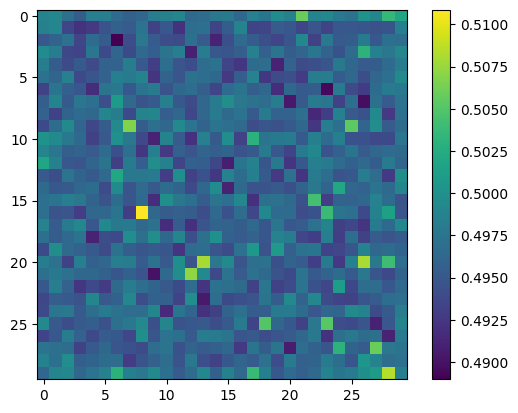

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

In [30]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)
mae = losses.MeanAbsoluteError()

def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    total_gen_loss = gene_loss + (100 * l1_loss)

    return total_gen_loss, gene_loss, l1_loss

def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

print("✅")

✅


In [31]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

print("✅")

✅


In [32]:
@tf.function
def train_step(sketch,real_colored,generator,discriminator):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator 예측
        fake_colored = generator(sketch, training=True)
        # Discriminator 예측
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)
        # Generator 손실 계산
        total_gen_loss, gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        # Discrminator 손실 계산
        disc_loss = get_disc_loss(fake_disc, real_disc)

    gene_gradient = gene_tape.gradient(total_gen_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return total_gen_loss , l1_loss, disc_loss

In [33]:
class SaveModelWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # 현재 에포크의 모델 가중치를 파일로 저장
        self.model.save_weights(f'epoch_{epoch}_weights.h5')

        # 이전 에포크의 가중치와 비교 (옵션)
        # 여기서는 간단히 파일 존재 여부만 확인
        # 실제로는 가중치를 로드하고 비교하는 로직이 필요
        previous_epoch_weights = f'epoch_{epoch-1}_weights.h5'
        if os.path.exists(previous_epoch_weights):
            print(f"Comparing weights with previous epoch: {previous_epoch_weights}")
            # 여기에 가중치 비교 로직 추가


## 학습

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
EPOCHS=60
import time
CHECK_INTERVAL = 4  
# 현재 시간을 기록합니다.
start_time = time.time()
# 콜백 초기화
callbacks = [
    ModelCheckpoint('model.h5', save_best_only=True),
    EarlyStopping(patience=5)
]
with strategy.scope():
    generator = UNetGenerator()
    discriminator = Discriminator()

for epoch in range(1, EPOCHS+1):


    for i, (colored, sketch) in enumerate(train_images):


        # 학습 단계 수행
        g_loss, l1_loss, d_loss = train_step(sketch, colored, generator, discriminator)


        # 10회 반복마다 손실을 출력
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")
    if epoch % CHECK_INTERVAL == 0:
        elapsed_time = time.time() - start_time
        print(f"Epochs {epoch-CHECK_INTERVAL+1}-{epoch} took {elapsed_time:.2f} seconds")
        
        # 다음 시간 체크를 위해 시작 시간을 재설정합니다.
        start_time = time.time()       

2023-12-01 18:59:30.488060: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inu_net_generator_1/decode_block_21/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-01 18:59:34.167565: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd813eb94c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-01 18:59:34.167600: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-01 18:59:34.177126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701424774.235400    3196 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


EPOCH[1] - STEP[10]                     
Generator_loss:35.1551                     
L1_loss:0.3441                     
Discriminator_loss:1.1008

EPOCH[1] - STEP[20]                     
Generator_loss:33.2904                     
L1_loss:0.3253                     
Discriminator_loss:0.9644

EPOCH[1] - STEP[30]                     
Generator_loss:29.9331                     
L1_loss:0.2941                     
Discriminator_loss:1.1968

EPOCH[1] - STEP[40]                     
Generator_loss:26.6114                     
L1_loss:0.2584                     
Discriminator_loss:1.0928

EPOCH[1] - STEP[50]                     
Generator_loss:22.4874                     
L1_loss:0.2172                     
Discriminator_loss:0.8509

EPOCH[1] - STEP[60]                     
Generator_loss:23.7504                     
L1_loss:0.2297                     
Discriminator_loss:0.8436

EPOCH[1] - STEP[70]                     
Generator_loss:26.2097                     
L1_loss:0.2544             

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
EPOCHS=60
# 콜백 초기화
callbacks = [
    ModelCheckpoint('model.h5', save_best_only=True),
    EarlyStopping(patience=5)
]
with strategy.scope():
    generator = UNetGenerator()
    discriminator = Discriminator()
# 콜백의 시작 메서드 호출
for callback in callbacks:
    callback.on_train_begin()

for epoch in range(1, EPOCHS+1):
    # 각 에포크 시작 시 콜백 호출
    for callback in callbacks:
        callback.on_epoch_begin(epoch)

    for i, (colored, sketch) in enumerate(train_images):
        # 각 배치 시작 시 콜백 호출
        for callback in callbacks:
            callback.on_batch_begin(i)

        # 학습 단계 수행
        g_loss, l1_loss, d_loss = train_step(sketch, colored, generator, discriminator)

        # 각 배치 종료 시 콜백 호출
        for callback in callbacks:
            callback.on_batch_end(i)

        # 10회 반복마다 손실을 출력
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

    # 각 에포크 종료 시 콜백 호출
    for callback in callbacks:
        callback.on_epoch_end(epoch)

# 콜백의 종료 메서드 호출
for callback in callbacks:
    callback.on_train_end()


## 테스트 시각화

In [ ]:
test_ind = 1

f = data_path + os.listdir(data_path)[test_ind]
colored, sketch = load_img(f)

pred = generator(tf.expand_dims(sketch, 0))
pred = denormalize(pred)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(denormalize(sketch))
plt.subplot(1,3,2); plt.imshow(pred[0])
plt.subplot(1,3,3); plt.imshow(denormalize(colored))

## 회고
### 배운점
데이터 증강 , GPU로 모델 돌리기,GAN, cGAN 등 다양한 생성모델을 만드는 방법을 배웠다.
### 아쉬운점
분산 환경을 통해 학습을 시키지 못한것이 아쉽다.
### 느낀점
GPU 환경을 꼭 써야한다. 시간이 아까우니까!